In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from classeteste.ipynb import Seis

ModuleNotFoundError: No module named 'SeismicProcess'

Chamar SVD power

subroutine svd_filt(nz,nx,lz,lx,D,Dfilt)
        implicit none
        integer         :: i,j,nz,nx,lz,lx
        real            :: D(nz,nx),Daux(1-lz/2:nz+lz/2,1-lx/2:nx+lx/2),Dfilt(nz,nx),D1(lz,lx)
                
        Daux = 0.
        Daux(1:nz,1:nx) = D

        do j=1,nx
                do i=1,nz
                        call svd_power(lz,lx,Daux(i-lz/2:i+lz/2,j-lx/2:j+lx/2),D1)
                        Dfilt(i,j)=D1(lz/2+1,lx/2+1)

                end do        
        end do

        return

        end subroutine       


In [49]:
def svd_filt(Ns,nt,ls,lt,D):
    
    ax=np.zeros((ls,lt))
    ax=ax.reshape(ls,lt)
    aux=np.zeros((ls,lt))
    aux=aux.reshape(ls,lt)
    Dfilt=np.zeros((Ns,nt))
    Dfilt=Dfilt.reshape(Ns,nt)
    Daux=np.zeros((Ns+2*ls,nt+2*lt))
    Daux=Daux.reshape(Ns+2*ls,nt+2*lt)
    

    
    Daux[ls-1:ls+Ns-1,lt-1:lt+nt-1]=D
    
    j=0;i=0
    while(i<Ns-1):
        while(j<nt-1):                                    
            aux=svd_power(ls,lt,Daux[i:i+ls,j:j+lt])
            Dfilt[i,j]=aux[int(ls/2),int(lt/2)]
            j+=1
            
        i+=1
        
       
    
    return Dfilt

def svd_power(m,n,x):
    
    ninter_max=50
    tol=10**-30
      

    Xn=np.zeros(m*n)
    Xn=Xn.reshape(m,n)
    
    u=np.zeros(m);v=np.zeros(n)
    
    if((x*x).all==0):
        Xn=0
    else:
        XTX=np.matmul(np.transpose(x),x)
        xaux=np.ones(n)
        w1=np.matmul(XTX,xaux)
        Q0=np.dot(xaux,w1)
        xaux=np.divide(w1,np.sqrt(Q0),where=np.sqrt(Q0)!=0)
        
    ikey=0
    k=0
    
    while(ikey==0):
        k=k+1
        w1=np.matmul(XTX,xaux)
        Q1=np.dot(xaux,w1)
        xaux=w1/np.sqrt(Q1)
        if(abs(Q1-Q0)<=tol or k==ninter_max):
            ikey=1
            Q0=Q1
            
    xx=np.dot(xaux,xaux)
    slambda=np.divide(Q1,xx)
    sigma=np.sqrt(slambda)
    
    v[0:n-1]=np.divide(xaux[0:n-1],np.sqrt(xx),where=np.sqrt(xx)!=0)
    u=np.matmul(x,v)
    
    i=0
    while(i<m):
       
        Xn[i,:]=np.multiply(v[:],u[i])  
        i=i+1
        

    return Xn
    

Função SVD power method

In [3]:
m=100;n=100

In [4]:
x=np.ones(m*n)

In [5]:
x=x.reshape(m,n)

In [6]:
x.shape

(100, 100)

In [7]:
x[10:30,:]=20; x[0:10,:]=0;x[89:99,:]=0;x[:,0:10]=0;x[:,89:100]=0

In [54]:
Xn

array([[nan, nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [51]:
Xn=svd_filt(m,n,3,3,x)

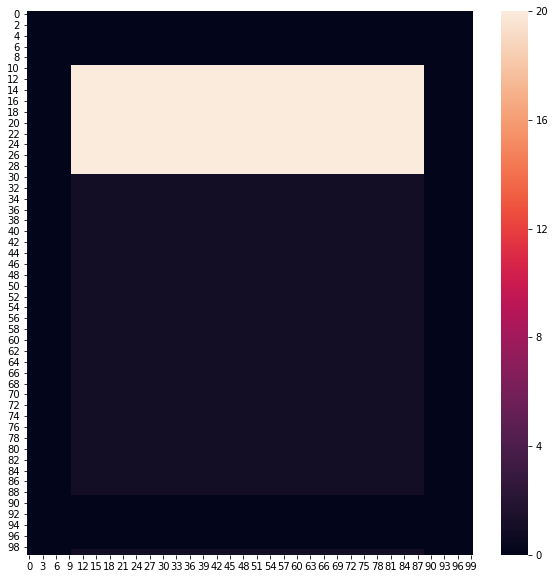

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(x)

In [ ]:
int(x1)


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Xn)

In [ ]:
a=x-x1

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(a)

In [ ]:
v=np.arange(1,10,1)

In [ ]:
v

In [ ]:
u=1


In [ ]:
Xn=Xn[1,:]*v[:]*u